# Bay Area Bike Share Analysis

Christian Guzman

October 2016

In this analysis project, data is pulled from **1 year** of the system launch of the bike share program from August 29, 2013 to August 31, 2014.

**Question 1:** How often do user trips go over 30 minutes?

**Question 2:** Which method of payment do the most users prefer?

## Data Wrangling

In [1]:
# import all necessary packages and functions.
import csv
from datetime import datetime
import numpy as np
import pandas as pd
import os
from IPython.display import display
%matplotlib inline

In [2]:
# Get working directory
os.getcwd()

'C:\\Users\\cguzm_000\\Desktop\\Jupyter Projects'

In [3]:
# Change wortrip_data201402king directory
os.chdir('C:\\Users\\cguzm_000' \
         '\\Desktop\\Jupyter Projects\\dandp0-bikeshareanalysis')

In [4]:
# first half of trip data
trip_data201402 = pd.read_csv('201402_trip_data.csv')
# second half of trip data
trip_data201408 = pd.read_csv('201408_trip_data.csv')

In [5]:
trip_data201402.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscription Type,Zip Code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [6]:
trip_data201402.tail()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscription Type,Zip Code
144010,198771,385,2/28/2014 22:15,Powell Street BART,39,2/28/2014 22:22,South Van Ness at Market,66,483,Subscriber,94404
144011,198772,145,2/28/2014 22:38,Commercial at Montgomery,45,2/28/2014 22:40,Davis at Jackson,42,425,Subscriber,94111
144012,198773,677,2/28/2014 22:45,Embarcadero at Sansome,60,2/28/2014 22:56,Market at 4th,76,438,Subscriber,94102
144013,198774,64128,2/28/2014 23:01,Civic Center BART (7th at Market),72,3/1/2014 16:50,Harry Bridges Plaza (Ferry Building),50,414,Customer,94124
144014,198775,570,2/28/2014 23:20,2nd at South Park,64,2/28/2014 23:30,Townsend at 7th,65,577,Subscriber,94107


In [7]:
trip_data201408.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
0,432946,406,8/31/2014 22:31,Mountain View Caltrain Station,28,8/31/2014 22:38,Castro Street and El Camino Real,32,17,Subscriber,94040
1,432945,468,8/31/2014 22:07,Beale at Market,56,8/31/2014 22:15,Market at 4th,76,509,Customer,11231
2,432944,534,8/31/2014 22:06,Beale at Market,56,8/31/2014 22:15,Market at 4th,76,342,Customer,11231
3,432942,1041,8/31/2014 21:45,Embarcadero at Sansome,60,8/31/2014 22:02,Steuart at Market,74,603,Customer,94521
4,432941,1091,8/31/2014 21:44,Embarcadero at Sansome,60,8/31/2014 22:02,Steuart at Market,74,598,Customer,94521


In [8]:
trip_data201408.tail()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
171787,198780,429,3/1/2014 0:42,Spear at Folsom,49,3/1/2014 0:49,Broadway St at Battery St,82,395,Subscriber,94105
171788,198779,179,3/1/2014 0:22,Powell Street BART,39,3/1/2014 0:25,Market at 4th,76,439,Subscriber,94107
171789,198778,224,3/1/2014 0:21,Civic Center BART (7th at Market),72,3/1/2014 0:25,Golden Gate at Polk,59,380,Subscriber,94103
171790,198777,445,3/1/2014 0:16,San Francisco Caltrain (Townsend at 4th),70,3/1/2014 0:23,Embarcadero at Bryant,54,268,Subscriber,94105
171791,198776,177,3/1/2014 0:14,Yerba Buena Center of the Arts (3rd @ Howard),68,3/1/2014 0:17,Market at Sansome,77,398,Subscriber,94105


In [9]:
#Display the first few rows of the station data file

station_info = pd.read_csv('201402_station_data.csv')
station_info.head()

,station_id,name,lat,long,dockcount,landmark,installation
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


In [10]:
station_info.tail()            

,station_id,name,lat,long,dockcount,landmark,installation
64,76,Market at 4th,37.786305,-122.404966,19,San Francisco,8/25/2013
65,77,Market at Sansome,37.789625,-122.400811,27,San Francisco,8/25/2013
66,80,San Jose Government Center,37.352601,-121.905733,15,San Jose,12/31/2013
67,82,Broadway St at Battery St,37.798541,-122.400862,15,San Francisco,1/22/2014
68,83,Mezes Park,37.491269,-122.236234,15,Redwood City,2/20/2014


In [11]:
station_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 7 columns):
station_id      69 non-null int64
name            69 non-null object
lat             69 non-null float64
long            69 non-null float64
dockcount       69 non-null int64
landmark        69 non-null object
installation    69 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 3.8+ KB


In [12]:
station_info.columns

Index([u'station_id', u'name', u'lat', u'long', u'dockcount', u'landmark',
       u'installation'],
      dtype='object')

In [13]:
station_info.describe()

,station_id,lat,long,dockcount
count,69.000000,69.000000,69.000000,69.000000
mean,42.405797,37.593840,-122.223453,17.695652
std,23.822455,0.202682,0.207269,4.026765
min,2.000000,37.329732,-122.418954,11.000000
25%,24.000000,37.390277,-122.400811,15.000000
50%,42.000000,37.771058,-122.388013,15.000000
75%,63.000000,37.788446,-122.081896,19.000000
max,83.000000,37.804770,-121.877349,27.000000


## Condensing the data
The dataframes will be condensed to only display the fields, trip duration, start time, start terminal, end terminal and subscription type.

Before condensing the data tables, I will concatenate both trip data files first.

In [14]:
trip_data201402.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscription Type,Zip Code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [15]:
trip_data201408.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
0,432946,406,8/31/2014 22:31,Mountain View Caltrain Station,28,8/31/2014 22:38,Castro Street and El Camino Real,32,17,Subscriber,94040
1,432945,468,8/31/2014 22:07,Beale at Market,56,8/31/2014 22:15,Market at 4th,76,509,Customer,11231
2,432944,534,8/31/2014 22:06,Beale at Market,56,8/31/2014 22:15,Market at 4th,76,342,Customer,11231
3,432942,1041,8/31/2014 21:45,Embarcadero at Sansome,60,8/31/2014 22:02,Steuart at Market,74,603,Customer,94521
4,432941,1091,8/31/2014 21:44,Embarcadero at Sansome,60,8/31/2014 22:02,Steuart at Market,74,598,Customer,94521


Upon further examination, we see that the column name **Subscription Type** for trip_data201402 is labeled slightly differently as, **Subscriber Type** in trip_data201408. This should be fixed before concatenation.

In [16]:
#Test changing columns
test_trip_data201402 = trip_data201402
test_trip_data201402.columns = trip_data201402.columns
test_trip_data201402.columns = trip_data201408.columns
trip_data201402.columns

Index([u'Trip ID', u'Duration', u'Start Date', u'Start Station',
       u'Start Terminal', u'End Date', u'End Station', u'End Terminal',
       u'Bike #', u'Subscriber Type', u'Zip Code'],
      dtype='object')

In [17]:
#Fix up column names for easier use.
test_trip_data201402.columns = [u'TripID', u'Duration', u'StartDate', u'StartStation',
       u'StartTerminal', u'EndDate', u'EndStation', u'EndTerminal',
       u'Bike #', u'SubscriberType', u'ZipCode']
trip_data201408.columns = trip_data201402.columns
trip_data201402.head()

,TripID,Duration,StartDate,StartStation,StartTerminal,EndDate,EndStation,EndTerminal,Bike #,SubscriberType,ZipCode
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [18]:
# Concatentation of both data frames.
bigdata = pd.concat([trip_data201402, trip_data201408], ignore_index=False)

In [19]:
bigdata.head()

,TripID,Duration,StartDate,StartStation,StartTerminal,EndDate,EndStation,EndTerminal,Bike #,SubscriberType,ZipCode
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [20]:
bigdata.tail()

,TripID,Duration,StartDate,StartStation,StartTerminal,EndDate,EndStation,EndTerminal,Bike #,SubscriberType,ZipCode
171787,198780,429,3/1/2014 0:42,Spear at Folsom,49,3/1/2014 0:49,Broadway St at Battery St,82,395,Subscriber,94105
171788,198779,179,3/1/2014 0:22,Powell Street BART,39,3/1/2014 0:25,Market at 4th,76,439,Subscriber,94107
171789,198778,224,3/1/2014 0:21,Civic Center BART (7th at Market),72,3/1/2014 0:25,Golden Gate at Polk,59,380,Subscriber,94103
171790,198777,445,3/1/2014 0:16,San Francisco Caltrain (Townsend at 4th),70,3/1/2014 0:23,Embarcadero at Bryant,54,268,Subscriber,94105
171791,198776,177,3/1/2014 0:14,Yerba Buena Center of the Arts (3rd @ Howard),68,3/1/2014 0:17,Market at Sansome,77,398,Subscriber,94105


In [21]:
len(bigdata)

315807

In [22]:
#Check number of rows
len(trip_data201402) + len(trip_data201408)

315807

In [23]:
trip_data201408[-1:]

,TripID,Duration,StartDate,StartStation,StartTerminal,EndDate,EndStation,EndTerminal,Bike #,SubscriberType,ZipCode
171791,198776,177,3/1/2014 0:14,Yerba Buena Center of the Arts (3rd @ Howard),68,3/1/2014 0:17,Market at Sansome,77,398,Subscriber,94105


In [24]:
trip_data201402[:1]

,TripID,Duration,StartDate,StartStation,StartTerminal,EndDate,EndStation,EndTerminal,Bike #,SubscriberType,ZipCode
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127


In [25]:
# trip duration, start time, start terminal, end terminal and sub type.

In [26]:
summary_trip_data = bigdata[['TripID', 'Duration', 'StartDate', 'StartTerminal', 'EndTerminal', 'SubscriberType']]
summary_trip_data.head()

,TripID,Duration,StartDate,StartTerminal,EndTerminal,SubscriberType
0,4576,63,8/29/2013 14:13,66,66,Subscriber
1,4607,70,8/29/2013 14:42,10,10,Subscriber
2,4130,71,8/29/2013 10:16,27,27,Subscriber
3,4251,77,8/29/2013 11:29,10,10,Subscriber
4,4299,83,8/29/2013 12:02,66,67,Subscriber


In [27]:
import warnings
warnings.filterwarnings('ignore')
#Convert seconds to minutes
summary_trip_data['Duration'] = summary_trip_data['Duration'] / 60
summary_trip_data.head(10)

,TripID,Duration,StartDate,StartTerminal,EndTerminal,SubscriberType
0,4576,1.050000,8/29/2013 14:13,66,66,Subscriber
1,4607,1.166667,8/29/2013 14:42,10,10,Subscriber
2,4130,1.183333,8/29/2013 10:16,27,27,Subscriber
3,4251,1.283333,8/29/2013 11:29,10,10,Subscriber
4,4299,1.383333,8/29/2013 12:02,66,67,Subscriber
5,4927,1.716667,8/29/2013 18:54,59,59,Subscriber
6,4500,1.816667,8/29/2013 13:25,4,5,Subscriber
7,4563,1.850000,8/29/2013 14:02,8,8,Subscriber
8,4760,1.883333,8/29/2013 17:01,66,66,Subscriber
9,4258,1.900000,8/29/2013 11:33,10,11,Subscriber


In [33]:
# Expand date column into year, month, weekday and hour columns.
# Test on 10 rows of data verison.
def expand_date(summary_trip_data):
    s = summary_trip_data.head(10)['StartDate']

    s0 = pd.DataFrame({
            'start_date': pd.to_datetime(s).dt.date,
            'start_year': pd.to_datetime(s).dt.year,
            'start_hour': pd.to_datetime(s).dt.hour,
            'start_month': pd.to_datetime(s).dt.month,
            'weekday': pd.to_datetime(s).dt.weekday

        })

    s1 = summary_trip_data.head(10)
    s1.loc[:,'StartYear'] = s0['start_year']
    s1.loc[:,'StartMonth'] = s0['start_month']
    s1.loc[:,'Weekday'] = s0['weekday']
    s1.loc[:,'StartHour'] = s0['start_hour']
    
    return s1

In [34]:
# Test on 10 rows...
expand_date(summary_trip_data.head(10))

,TripID,Duration,StartDate,StartTerminal,EndTerminal,SubscriberType,StartYear,StartMonth,Weekday,StartHour
0,4576,1.050000,8/29/2013 14:13,66,66,Subscriber,2013,8,3,14
1,4607,1.166667,8/29/2013 14:42,10,10,Subscriber,2013,8,3,14
2,4130,1.183333,8/29/2013 10:16,27,27,Subscriber,2013,8,3,10
3,4251,1.283333,8/29/2013 11:29,10,10,Subscriber,2013,8,3,11
4,4299,1.383333,8/29/2013 12:02,66,67,Subscriber,2013,8,3,12
5,4927,1.716667,8/29/2013 18:54,59,59,Subscriber,2013,8,3,18
6,4500,1.816667,8/29/2013 13:25,4,5,Subscriber,2013,8,3,13
7,4563,1.850000,8/29/2013 14:02,8,8,Subscriber,2013,8,3,14
8,4760,1.883333,8/29/2013 17:01,66,66,Subscriber,2013,8,3,17
9,4258,1.900000,8/29/2013 11:33,10,11,Subscriber,2013,8,3,11


In [31]:
e_summary_trip_data = expand_date(summary_trip_data.head(10))
e_summary_trip_data.to_csv('expanded_summary_trip_data.csv')

In [32]:
# Works! Now the full sample data....

def expand_date(summary_trip_data):
    s = summary_trip_data.head(27345)['StartDate']

    s0 = pd.DataFrame({
            'start_date': pd.to_datetime(s).dt.date,
            'start_year': pd.to_datetime(s).dt.year,
            'start_hour': pd.to_datetime(s).dt.hour,
            'start_month': pd.to_datetime(s).dt.month,
            'weekday': pd.to_datetime(s).dt.weekday

        })

    s1 = summary_trip_data.head(27345)
    s1.loc[:,'StartYear'] = s0['start_year']
    s1.loc[:,'StartMonth'] = s0['start_month']
    s1.loc[:,'Weekday'] = s0['weekday']
    s1.loc[:,'StartHour'] = s0['start_hour']
    
    return s1

# expanded summary trip data
e_summary_trip_data = expand_date(summary_trip_data.head(27345))
e_summary_trip_data.to_csv('expanded_summary_trip_data.csv')

In [33]:
# Summary dataframe with expanded datetime column
e_summary_trip_data.head()

,TripID,Duration,StartDate,StartTerminal,EndTerminal,SubscriberType,StartYear,StartMonth,Weekday,StartHour
0,4576,1.050000,8/29/2013 14:13,66,66,Subscriber,2013,8,3,14
1,4607,1.166667,8/29/2013 14:42,10,10,Subscriber,2013,8,3,14
2,4130,1.183333,8/29/2013 10:16,27,27,Subscriber,2013,8,3,10
3,4251,1.283333,8/29/2013 11:29,10,10,Subscriber,2013,8,3,11
4,4299,1.383333,8/29/2013 12:02,66,67,Subscriber,2013,8,3,12


## Exploratory Data Analysis

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = 8,4

In [35]:
# Q1. How often do user trips go over 30 min?

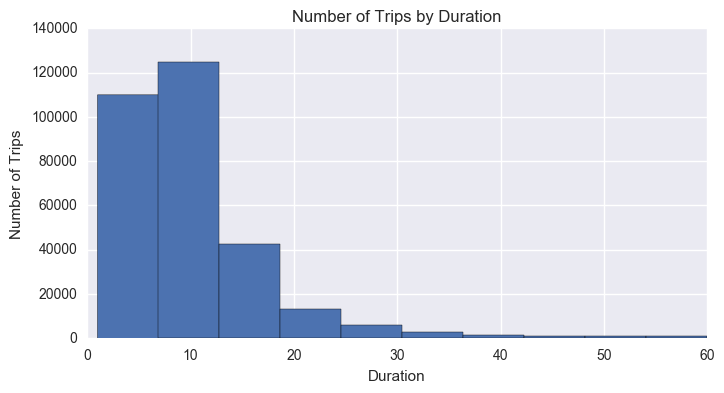

In [36]:
under_60min = summary_trip_data[summary_trip_data.Duration < 60]
plt.hist(under_60min['Duration'])
plt.title('Number of Trips by Duration')
plt.xlabel('Duration')
plt.ylabel('Number of Trips')
plt.show()

As we can see most riders are aware of how the rental system works, and usually ride under 30 minutes.

The 5 to 10 minute duration bracket has the most trips with over 120,000 trips.

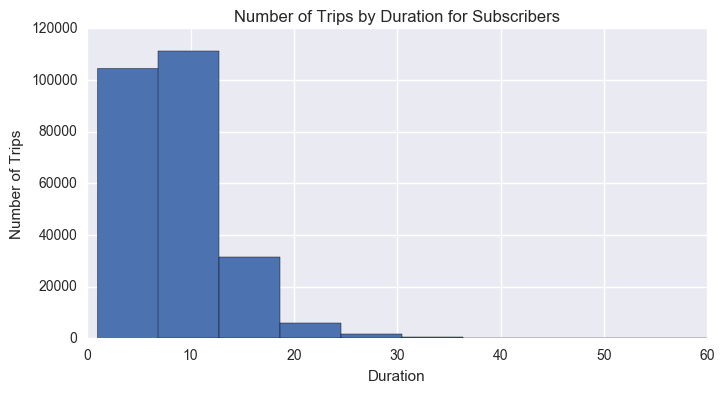

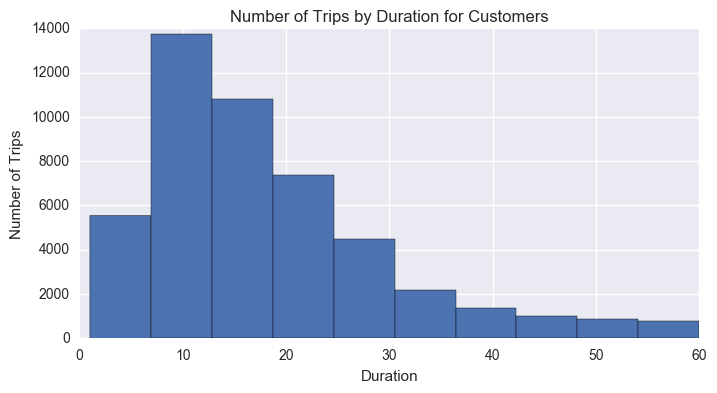

In [37]:
# compare subscriber and customer histograms
under_60min_subs = summary_trip_data[(summary_trip_data.Duration < 60) & (summary_trip_data.SubscriberType == 'Subscriber')]
plt.hist(under_60min_subs['Duration'])
plt.title('Number of Trips by Duration for Subscribers')
plt.xlabel('Duration')
plt.ylabel('Number of Trips')
plt.show()

# And now histogram for customers
customer_filter = (summary_trip_data.Duration < 60) & (summary_trip_data.SubscriberType == 'Customer')
under_60min_cust = summary_trip_data[customer_filter]
plt.hist(under_60min_cust['Duration'])
plt.title('Number of Trips by Duration for Customers')
plt.xlabel('Duration')
plt.ylabel('Number of Trips')
plt.show()

Comparing the two histograms for subscribers and customers we see that customers are more likely than the annual members to exceed the 30 minute time limit before incurring additional fees.

In [116]:
# Q2. Which method of payment do most users prefer?

In [117]:
subscriber_type = summary_trip_data['SubscriberType']
#number of subscriber trips
len(subscriber_type[subscriber_type != 'Customer'])


256529

In [118]:
#number of customer trips
len(subscriber_type[subscriber_type == 'Customer'])

59278

In [48]:
user_trips = summary_trip_data[['TripID', 'SubscriberType']].groupby('SubscriberType').agg(['count']).reset_index()
user_trips.columns = ['UserType', 'trips']
user_trips['percentage'] = user_trips['trips'] / len(summary_trip_data) * 100
user_trips

,UserType,trips,percentage
0,Customer,59278,18.770325
1,Subscriber,256529,81.229675


Most users are subscribers, with over 81% of the trips being made by them.

## Further Exploration

Below I will compare the sample data of the extended date column dataframe, e_summary_trip_data, in order to observe any differences in ridership depending on the weekday, and weekend.

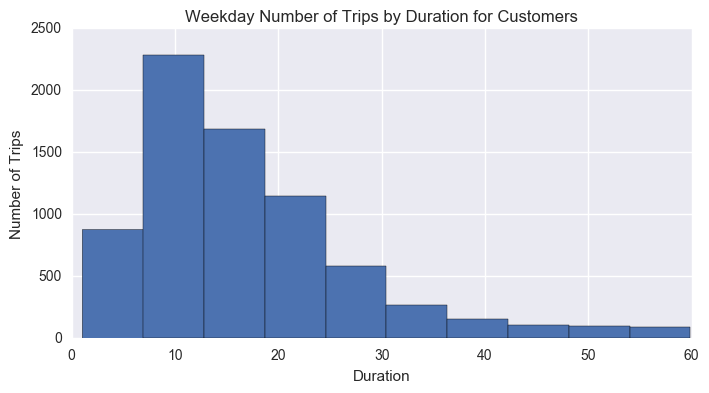

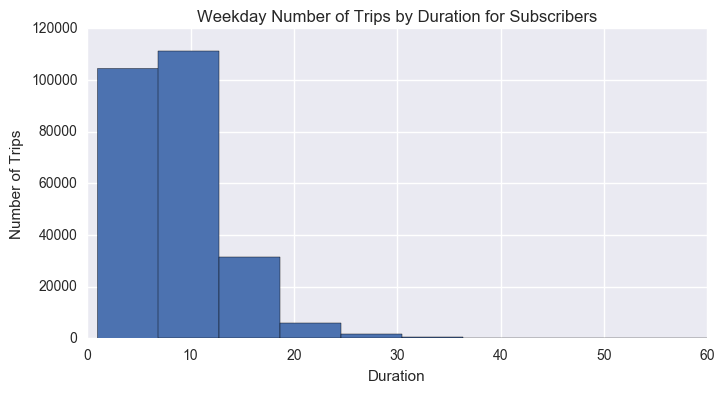

In [53]:
weekday_cust = (e_summary_trip_data.Duration < 60) & (e_summary_trip_data.SubscriberType == 'Customer') \
                & (e_summary_trip_data.Weekday <= 5)
under_60min_cust = e_summary_trip_data[weekday_cust]
plt.hist(under_60min_cust['Duration'])
plt.title('Weekday Number of Trips by Duration for Customers')
plt.xlabel('Duration')
plt.ylabel('Number of Trips')
plt.show()

weekday_subs = (e_summary_trip_data.Duration < 60) & (e_summary_trip_data.SubscriberType == 'Subscriber') \
                & (e_summary_trip_data.Weekday <= 5)
under_60min_cust = e_summary_trip_data[weekday_subs]
plt.hist(under_60min_subs['Duration'])
plt.title('Weekday Number of Trips by Duration for Subscribers')
plt.xlabel('Duration')
plt.ylabel('Number of Trips')
plt.show()

Weekend histograms

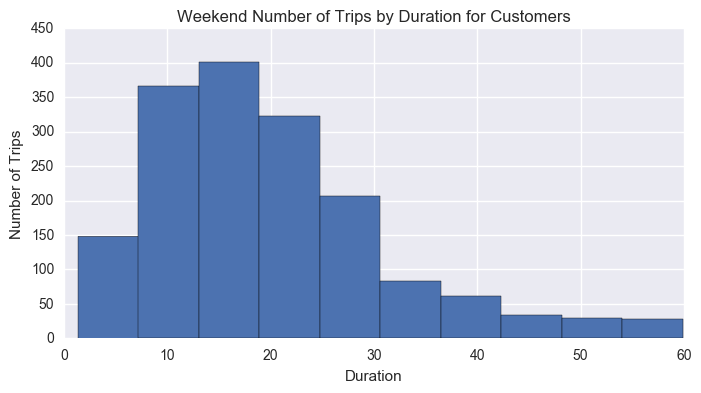

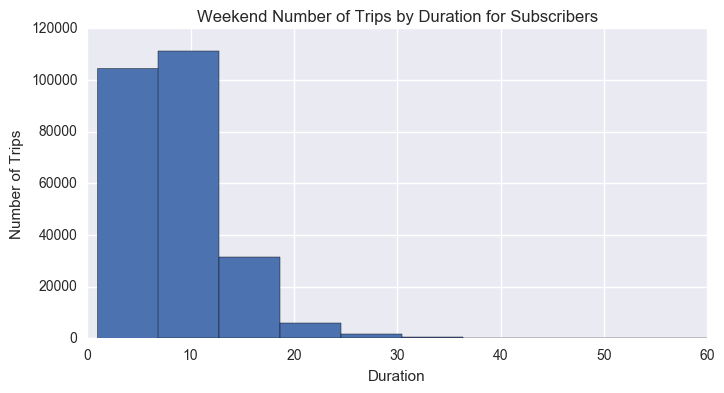

In [56]:
weekend_cust = (e_summary_trip_data.Duration < 60) & (e_summary_trip_data.SubscriberType == 'Customer') \
                & (e_summary_trip_data.Weekday > 5)
under_60min_cust = e_summary_trip_data[weekend_cust]
plt.hist(under_60min_cust['Duration'])
plt.title('Weekend Number of Trips by Duration for Customers')
plt.xlabel('Duration')
plt.ylabel('Number of Trips')
plt.show()

weekend_subs = (e_summary_trip_data.Duration < 60) & (e_summary_trip_data.SubscriberType == 'Subscriber') \
                & (e_summary_trip_data.Weekday > 5)
under_60min_cust = e_summary_trip_data[weekend_subs]
plt.hist(under_60min_subs['Duration'])
plt.title('Weekend Number of Trips by Duration for Subscribers')
plt.xlabel('Duration')
plt.ylabel('Number of Trips')
plt.show()

## Conclusions

I decided to compare subscribers with non-subscribers, in order to observe any trends between the two on the start of the weekend. What is interesting about this visualization is that non-subscribers are more likely than subscribers to take trips longer than 30 minutes.

I chose this comparison visualization in order to observe any differences in trends for trip duration in between the weekdays (weekdays 1-5) and the weekend (weekdays 6,7). There is a drop-off of rides in Saturday compared with Monday. This implies there is more ridership during a workday, than the start of the weekend. Something interesting about this visualization is that it shows higher numbers of trips longer than 30 minutes even though there are less trips in general. We saw in the previous visualization that this is likely due to non-subscribers who are more likely to have trips longer than 30 minutes than subscribers.

All in all subscribers seem to use the service for short commutes to their jobs in the workday, while customers are more likely to have rides longer than 30 minutes and ride on the weekend, implying a different use.

**Potential future analyses**:
I would like to learn more about how people use other services in New York City and how alternative systems of transportation perform.

